Author: <a href="http://www.shugert.com.mx">Samuel Noriega</a>

# Linear Regression To Solve Advertising Problems

The purpose of this tutorial is to get a clear idea on how a linear regression can be used to solve a marketing problem, such as selecting the right channels to advertise a product.

This time, we will use Google's <a href="https://www.tensorflow.org/">Tensorflow</a> on a <a href="https://www.docker.com/get-docker">Docker</a> container. TensorFlow is an open-source software library for machine learning across a range of tasks. It is a system for building and training <a href="https://en.wikipedia.org/wiki/Artificial_neural_network">neural networks</a> to detect and decipher patterns and correlations, analogous to (but not the same as) human learning and reasoning.

# What is a Linear Regression?

A linear regression model is one of the simplest regression models. It assumes linear relationship between $X$ and $Y$. The output equation is defined as follows:

$$\hat{y} = WX + b$$


# Our Advertising Dataset

The Advertising data set we are going to use is from "<a href="http://www-bcf.usc.edu/~gareth/ISL/getbook.html">An Introduction to Statistical Learning</a>", textbook by Gareth James, Robert Tibshirani, and Trevor Hastie, which consists of the sales of a product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: **TV, radio, and newspaper**.


# Our Objetive

By training an **inference model**, a series of mathematical expressions we want to apply to our data that depends on a series of parameters. The values of parameters change through training in order for the model to learn and adjust its output.

The training loop consists in the following steps:
+ First, we need to initialize the model parameters to some random values.
+ Second, we need to read the training data -for each example, and possibly using randomization strategies in order to assure that training is stochastic.
+ Third, we need to execute the inference model on the training data, getting for each training example the model output with the parameter values. 
+ Four, we compute the loss.
+ And last, we adjuts the model parameters.

We need to repeat this process several times, according to the learning rate. After the training of the model is done we need to apply an evaluation phase. 

# Reading the data

The first thing we need to do is load our dataset and define our training set.

In [9]:
# load libraries
import warnings; warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Load data.
data = pd.read_csv('data/Advertising.csv',index_col=0)

# visualize our data set
data.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [10]:
# Define our train dataset
train_X = data[['Radio']].values 
train_Y = data.Sales.values 
train_Y = train_Y[:,np.newaxis]
n_samples = train_X.shape[0]

#print training samples for Radio values
print "Number of samples:", n_samples
print train_X.shape, train_Y.shape

Number of samples: 200
(200, 1) (200, 1)


## Let's now visualize our data set

### Radio investment

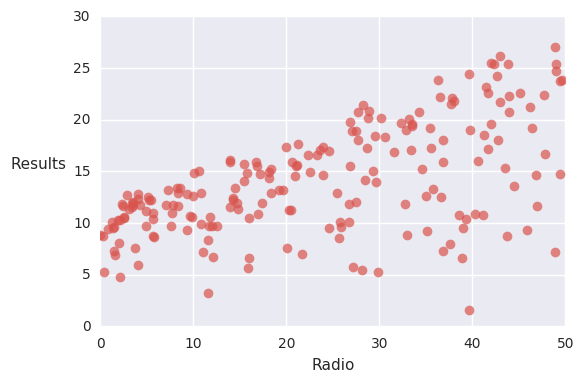

In [11]:
# visualize our results
fig, ax = plt.subplots(1, 1)
ax.set_ylabel('Results',
              rotation=0,
              ha='right', # horizontal alignment
              ma='left', # multiline alignment
             )
ax.set_xlabel('Radio')
ax.plot(train_X, train_Y, 'o', color=sns.xkcd_rgb['pale red'], alpha=0.7,label='Original data')
plt.show()


Optimization Finished!
cost= 9.0462 W= 0.202496 b= 9.31163


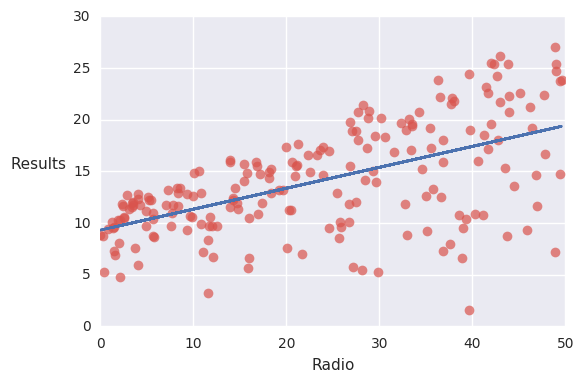

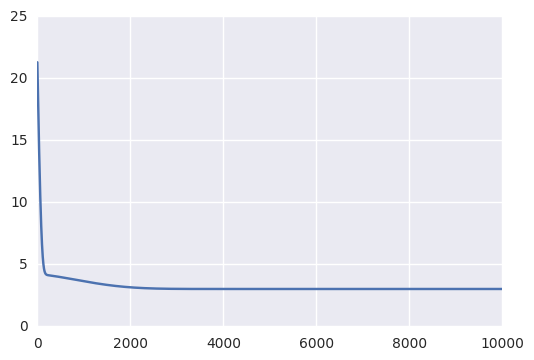

9.0462


In [12]:
# import tensor flow library
import tensorflow as tf

# problem: Solve  ŷ = WX + b

tf.reset_default_graph()

# Set up our training parameters
# ------------------------------
# learning rate
lr = 0.01
# training epochs
t_epochs = 10000

# Define TensorFlow Graph Inputs
X = tf.placeholder("float",[None,1])
y = tf.placeholder("float",[None,1])

# Create model variables 
# ----------------------
# Set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a linear model
y_pred = tf.add(tf.mul(X, W), b)

# Minimize the squared errors
# we will use L2 loss
cost = tf.reduce_sum(tf.pow(y_pred - y,2))/(2*n_samples) 

# Define the optimizer
'''Adam is an optimization algorithm that can used instead of the classical 
   stochastic gradient descent procedure to update network weights iterative 
   based in training data.'''
optimizer = tf.train.AdamOptimizer(lr).minimize(cost) 

# Initiate the variables
init = tf.initialize_all_variables()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    cost_plot = []
    # Fit all training data
    for epoch in range(t_epochs):
        sess.run(optimizer, 
                 feed_dict={X: train_X, y: train_Y})       
        cost_plot.append(sess.run(cost, 
                                  feed_dict={X: train_X, y:train_Y}))
                
    print ""
    print "Optimization Finished!"
    print "cost=", sess.run(cost, 
                            feed_dict={X: train_X, y: train_Y}), "W=", sess.run(W), "b=", sess.run(b)
    
    fig, ax = plt.subplots(1, 1)
    ax.set_ylabel('Results',
              rotation=0,
              ha='right', # horizontal alignment
              ma='left', # multiline alignment
             )
    ax.set_xlabel('Radio')
    ax.plot(train_X, 
            train_Y, 'o', 
            color=sns.xkcd_rgb['pale red'], 
            alpha=0.7,label='Original data')
    plt.plot(train_X, 
             sess.run(W) * train_X + sess.run(b), 
             label='Fitted line')
    plt.show()
    
    x = range(len(cost_plot))
    plt.plot(x,  np.sqrt(cost_plot))
    plt.show()
    print cost_plot[-1]

# Let's try it now with all 3 variables, Radio, Tv and Newspaper.

Using all 3 values as input, it becomes a multiple linear regression problem, but the process is similar.

In [14]:
# reset our graph to work with the new data
tf.reset_default_graph()

# We read our data set
data = pd.read_csv('data/Advertising.csv',index_col=0)

# Set up our training parameters
# ------------------------------
# learning rate
lr = 0.01
# training epochs
t_epochs = 10000

# Define our train dataset
# ------------------------
# we set all our variables as input vectors
train_X = data[['TV','Radio','Newspaper']].values
train_Y = data.Sales.values 
train_Y = train_Y[:,np.newaxis]
n_samples = train_X.shape[0]

# Print our samples 
print "Number of samples:", n_samples
print train_X.shape, train_Y.shape

Number of samples: 200
(200, 3) (200, 1)


In [15]:
# Define TensorFlow Graph Inputs
# ------------------------------
# we need to change our dimensions since we now have 3 inputs
X = tf.placeholder("float",[None,3])
y = tf.placeholder("float",[None,1])

# Create model variables 
# ----------------------
# Set model weights
# our W changes due to our new dimension
W = tf.Variable(tf.zeros([3, 1]),name="bias")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a multidimensional linear model
y_pred = tf.matmul(X, W) + b

# Minimize the squared errors
# we will use L2 loss
cost = tf.reduce_sum(tf.pow(y_pred - y,2))/(2*n_samples) 

# Define the optimizer
'''Adam is an optimization algorithm that can used instead of the classical 
   stochastic gradient descent procedure to update network weights iterative 
   based in training data.'''
optimizer = tf.train.AdamOptimizer(lr).minimize(cost) 

# Initiate the variables
init = tf.initialize_all_variables()

# Set up a display step for epoch log visualization
display_step = 1000

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    cost_plot = []
    # Fit all training data
    for epoch in range(t_epochs):
        sess.run(optimizer, 
                 feed_dict={X: train_X, y: train_Y})       
        cost_plot.append(sess.run(cost, 
                                  feed_dict={X: train_X, y:train_Y}))
        #Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch: ", '%04d' % (epoch+1), "\n Cost= ", sess.run(cost, feed_dict={X: train_X, y: train_Y}), \
          "\n W= ", sess.run(W), "\n b= ", sess.run(b), "\n"
                
    print ""
    print "Optimization Finished!"
    print "cost=", sess.run(cost, 
                            feed_dict={X: train_X, y: train_Y}), "W=", sess.run(W), "b=", sess.run(b)

Epoch:  0001 
 Cost=  71.7345 
 W=  [[ 0.01]
 [ 0.01]
 [ 0.01]] 
 b=  0.882848 

Epoch:  1001 
 Cost=  1.40955 
 W=  [[ 0.04709739]
 [ 0.19420089]
 [ 0.00192513]] 
 b=  2.44942 

Epoch:  2001 
 Cost=  1.39208 
 W=  [[ 0.04581039]
 [ 0.18872467]
 [-0.0009358 ]] 
 b=  2.92209 

Epoch:  3001 
 Cost=  1.39206 
 W=  [[ 0.04576474]
 [ 0.18853043]
 [-0.00103728]] 
 b=  2.93885 

Epoch:  4001 
 Cost=  1.39206 
 W=  [[ 0.04576467]
 [ 0.18853015]
 [-0.00103745]] 
 b=  2.93888 

Epoch:  5001 
 Cost=  1.39206 
 W=  [[ 0.04576465]
 [ 0.18853007]
 [-0.00103748]] 
 b=  2.93888 

Epoch:  6001 
 Cost=  1.39206 
 W=  [[ 0.04576468]
 [ 0.18853006]
 [-0.00103746]] 
 b=  2.93889 

Epoch:  7001 
 Cost=  1.39219 
 W=  [[ 0.04569313]
 [ 0.18845937]
 [-0.00110896]] 
 b=  2.93882 

Epoch:  8001 
 Cost=  1.39206 
 W=  [[ 0.04576509]
 [ 0.18853047]
 [-0.00103706]] 
 b=  2.93889 

Epoch:  9001 
 Cost=  1.39207 
 W=  [[ 0.04575393]
 [ 0.18851933]
 [-0.00104821]] 
 b=  2.93888 


Optimization Finished!
cost= 1.39206